In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

The goal is to find a way to find som ways to compute differents statitics about an equity tree

(insert image and further explain)

In [3]:
B0, U, D, P, Q, R, S = sp.symbols('b_0 u d p q r s', real=True, non_negative=True)
U = 1 + R*S
D = 1 - S
N = sp.symbols('n', integer=True, non_negative=True)
n = 1

# balance
## average

In [24]:
def compute_ud(r, s):
    return 1 + r*s,  1 -s 

def average(b0, p, r, s, n):
    u, d = compute_ud(r, s)
    return b0 * (p*u + (1-p)*d)**n

In [25]:
average(B0, P, R, S, N)

b_0*(p*(r*s + 1) + (1 - p)*(1 - s))**n

In [26]:
# estimating average growth rate of the average
((average(B0, P, R, S, N+100) / average(B0, P, R, S, N))**(1/100)).simplify()

Abs(p*r*s + p*s - s + 1)**1.0

In [17]:
# ie $ pu + (1-p)d $

## mode

In [19]:
def subs(sym, d):
    return sym.subs(d)
subs = np.vectorize(subs)

def binomial_coefficient(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

def generate_terms(b0, u, d, n):
    terms = []
    coefficients = []
    for k in range(n+1):
        coefficient = binomial_coefficient(n, k)
        term = b0 * (u)**(n-k) *  (d)**k
        coefficients = np.append(coefficients, coefficient)
        terms = np.append(terms, term)
    t = subs(terms, {u: P, d:1-P, b0:1})
    coefficients = coefficients * t 
    return coefficients, terms

def max_indices(coefs, p_value, first=True):
    position = 0 if first else -1
    coefs_value = subs(coefs, {P: p_value})
    max_val = np.max(coefs_value)
    max_indices = np.where(coefs_value == max_val)[0]
    return max_indices[position]

In [20]:
def modes(b0, p, r, s, n):
    u, d = compute_ud(r, s)
    coefs, terms = generate_terms(b0, u, d, n)
    idx1 = max_indices(coefs, p, first=True)
    idx2 = max_indices(coefs, p, first=False)
    return terms[idx1], terms[idx2]


In [27]:
modes(B0, .5, R, S, 1)

(b_0*(r*s + 1), b_0*(1 - s))

In [42]:
p_mode = 0.5

In [30]:
modes1_avg = []
for i in range(10):
    modes1_avg.append(modes(B0, p_mode, R, S, i+1)[0] / modes(B0, p_mode, R, S, i)[0])

print(modes1_avg)

[1 - s, r*s + 1, 1 - s, r*s + 1, 1 - s, 1 - s, r*s + 1, 1 - s, r*s + 1, 1 - s]


In [31]:
modes2_avg = []
for i in range(10):
    modes2_avg.append(modes(B0, p_mode, R, S, i+1)[-1] / modes(B0, .5, R, S, i)[-1])

print(modes2_avg)

[1 - s, r*s + 1, 1 - s, r*s + 1, 1 - s, 1 - s, 1 - s, 1 - s, (1 - s)**2/(r*s + 1), 1 - s]


In [285]:
p_mode = 0.81
start = 0
step = 109
# estimating average growth rate of the average
m_future = modes(B0, p_mode, R, S, start+step)[0]
m_past = modes(B0, p_mode, R, S, start)[0]
((m_future / m_past)**(1/step))

((r*s + 1)**89)**0.00917431192660551*Abs(s - 1)**0.18348623853211

In [161]:
p_mode = 0.5
# estimating average growth rate of the average
(modes(B0, p_mode, R, S, 0+5)[1] / modes(B0, p_mode, R, S, 0)[1])**(1/5)

((1 - s)**3)**0.2*Abs(r*s + 1)**0.4

## median

In [99]:
def generate_data(pval, coefs, terms):
    coefs_val = subs(coefs, {P: pval})
    return np.repeat(terms, np.round((coefs_val * len(terms)).astype(float)).astype(int))

In [100]:
def median(b0, p, r, s, n):
    u, d = compute_ud(r, s)
    coefs, terms = generate_terms(b0, u, d, n)
    data = generate_data(p, coefs, terms)
    n_data = len(data)
    if n_data % 2 == 0:
        middle_index_1 = n_data // 2 - 1
        middle_index_2 = n_data // 2
        return (data[middle_index_1] + data[middle_index_2]) / 2
    else:
        middle_index = n_data // 2
        return data[middle_index]

In [279]:
median_avg = []
for i in range(15):
    median_avg.append((median(B0, .9, R, S, i+1) / median(B0, .1, R, S, i)).factor())

print(median_avg)

[r*s + 1, -(r*s + 1)**2/(s - 1), (r*s + 1)**3/(s - 1)**2, -(r*s + 1)**4/(s - 1)**3, (r*s + 1)**5/(s - 1)**4, -(r*s + 1)**6/(s - 1)**5, (r*s + 1)**6*(r*s - s + 2)/(2*(s - 1)**6), (r*s + 1)**7/(s - 1)**6, 2*(r*s + 1)**8/((s - 1)**6*(r*s - s + 2)), -(r*s + 1)**8/(s - 1)**7, (r*s + 1)**9/(s - 1)**8, -(r*s + 1)**10/(s - 1)**9, (r*s + 1)**11/(s - 1)**10, -(r*s + 1)**12/(s - 1)**11, (r*s + 1)**13/(s - 1)**12]


In [284]:
p_mode = 0.81
start = 0
step = 109
# estimating average growth rate of the average
m_future = median(B0, p_mode, R, S, start+step)
m_past = median(B0, p_mode, R, S, start)
((m_future / m_past)**(1/step))

((1 - s)**21)**0.00917431192660551*Abs(r*s + 1)**0.807339449541284

## std

In [109]:
def std(b0, p, r, s, n):
    u, d = compute_ud(r, s)
    avg = average(b0, p, r, s, n)
    avg_of_square = b0**2 * (p*u**2 + (1-p)*d**2)**n
    return sp.sqrt(avg_of_square - avg**2) 

In [110]:
(std(B0, .5, R, S, 1)**2).expand().simplify()

b_0**2*s**2*(0.25*r**2 + 0.5*r + 0.25)

# balance simulation


In [299]:
b_avg, b_med, b_mode1, b_mode2, b_std = [], [], [], [], []

b0= 100
p = .7
s = 0.1
r = 3
params = {B0: b0, P:p, R: r, S: s, N: i}

for i in np.arange(0, 100, 1):
    u, d = compute_ud(r, s)
    x = np.round(99*p)
    y = 99 - x
    x2 = np.round(100*p)
    y2 = 100 - x
    b_avg.append(average(B0, P, R, S, i).subs(params))
    b_med.append(median(B0, p, R, S, i).subs(params))
    m = modes(B0, p, R, S, i)
    b_mode1.append(m[0].subs(params))
    b_mode2.append(m[-1].subs(params))
    b_std.append(std(B0, p, R, S, i).subs(params))

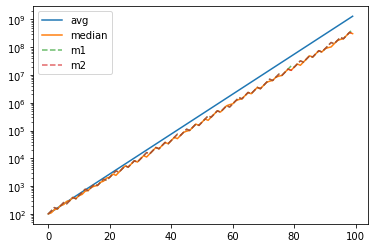

In [301]:
plt.plot(b_avg, label="avg")
plt.plot(b_med, label="median")
plt.plot(b_mode1, label="m1", ls='--', alpha=0.7)
plt.plot(b_mode2, label="m2", ls='--', alpha=0.7)

plt.yscale("log")
plt.legend()
plt.show()

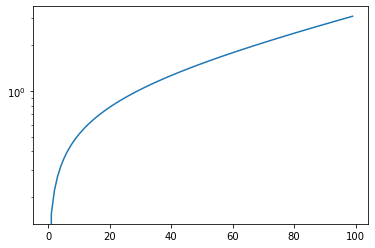

In [303]:
cv  = np.array(b_std) / np.array(b_avg)
plt.plot(cv, label="cv")
plt.yscale("log")